In [207]:

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# <p style="text-align:center"> Conceptual section </p>

##### 1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.  

Intercept: 2.939
Beta_1 -Tv: .046
Beta_2- Radio: .189
Beta_3- Newspaper: -.001

pvalue for tv and radio are less than .05, newspaper is greater than .05. 
tv and radio are significant, newspaper is not significant and that means for Tv and radio we reject the null hypothesis and accept the alternative hypthosis that there is a relationship between sales and tv and radio. For Newspaper, we accept the null hypthesis that there is no relationship between sales and newspaper 


As sales increases by 1 unit, tv increases by .046 units and radio increases by .189 units

# 2. Carefully explain the differences between the KNN classifier and KNN regression methods.


- both are given a value K training observations, and given a prediction point $x_0$. Where they differ is in the data they predict. KNN clasifier gives a probability back for which category y belongs to, while KNN regressor estimates $f(x_0)$ by taking the average of points around $x_0$. Both are very similar, classifier is categorical and Regressor is quantative. 

##### 3. Suppose we have a data set with five predictors, $X_1=$ GPA, $X_2=$ IQ, $X_3=$ Level (1 for College and 0 for High School), $X_4=$ Interaction between GPA and IQ, and $X_5=$ Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta}_0=50, \hat{\beta}_1=20, \hat{\beta}_2=0.07, \hat{\beta}_3=35, \hat{\beta}_4=0.01, \hat{\beta}_5=-10$.
- (a) Which answer is correct, and why?
- - i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.
- - ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.
- - iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.
- - iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.
- (b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.
- (c) True or false: Since the coeflicient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.


In [208]:
import numpy as np
import plotly.graph_objects as go

def model(gpa, iq, level):
    return 50 + gpa * 20 + iq * 0.07 + level * 35 + gpa * iq * 0.01 + gpa * level * -10

x = np.linspace(1, 5, 10)
y = np.linspace(1, 200, 20)

college = np.array([model(gpa, iq, 1) for gpa in x for iq in y]).reshape(len(x), len(y))
high_school = np.array([model(gpa, iq, 0) for gpa in x for iq in y]).reshape(len(x), len(y))

fig = go.Figure(data=[
    go.Surface(z=college, x=x, y=y, colorscale='Blues', showscale=False, name='College'),
    go.Surface(z=high_school, x=x, y=y, colorscale='Purples', showscale=False, name='High School')
])

fig.update_layout(scene=dict(
    xaxis_title='GPA',
    yaxis_title='IQ',
    zaxis_title='Salary'
))

fig.show()

In [209]:
iq = 110
gpa = 5

college_salary = model(gpa, iq, 1)
high_school_salary = model(gpa, iq, 0)

print(f"Salary for college graduates: {college_salary}")
print(f"Salary for high school graduates: {high_school_salary}")

Salary for college graduates: 148.2
Salary for high school graduates: 163.2


(a)

- (iii). For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.

In [210]:
#(b)

Y = model(4.0, 110, 1)
print('salary of a college graduate with IQ of 110 and a GPA of 4.0.:',Y)


salary of a college graduate with IQ of 110 and a GPA of 4.0.: 137.1


(c) False, we have to look at the p value to make sure that there is a significant interaction. If we do not have evidence of statistical significance, we cannot say

4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = β_0 + β_1X + β_2 X^2 + β_3 X^3 + \epsilon$. 
- (a) Suppose that the true relationship between X and Y is linear, i.e. $Y = β_0 + β_1X_1 + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer. 
- (b) Answer (a) using test rather than training RSS. 
- (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer. (d) Answer (c) using test rather than training RSS

(a) You would expect the cubic regression line RSS to be smaller, because as you add new predictors to your fit, RSS gets smaller. 

(b) test RSS would be higher becuase of over fitting 

(c) You would expect the cubic fit to hav elower RSS, because there is an expectation that it will be as flexible as linear regression, but also fit non-linear data better. 

(d) We cannot say, because if the data is highly non-linear, cubic fit will be better, but if it is not far from being truely linear, linear regression may be better. 

5. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form
$$
\hat{y}_i=x_i \hat{\beta}
$$
where
$$
\hat{\beta}=\left(\sum_{i=1}^n x_i y_i\right) /\left(\sum_{i^{\prime}=1}^n x_{i^{\prime}}^2\right) .
$$

Show that we can write
$$
\hat{y}_i=\sum_{i^{\prime}=1}^n a_{i^{\prime}} y_{i^{\prime}}
$$
``
What is $a_{i^{\prime}}$ ?

Note: We interpret this result by saying that the filled values from linear regression are linear combinations of the response values.


\begin{align}
\hat{y}_i 
  & = x_i \frac{\sum_{i=1}^nx_iy_i}{\sum_{i' = 1}^n x^2_{i'}} \\
  & = x_i \frac{\sum_{i'=1}^nx_{i'}y_{i'}}{\sum_{i'' = 1}^n x^2_{i''}} \\
  & = \frac{\sum_{i'=1}^n x_i x_{i'}y_{i'}}{\sum_{i'' = 1}^n x^2_{i''}} \\
  & = \sum_{i'=1}^n  \frac{ x_i x_{i'}y_{i'}}{\sum_{i'' = 1}^n x^2_{i''}} \\
  & = \sum_{i'=1}^n  \frac{ x_i x_{i'}}{\sum_{i'' = 1}^n x^2_{i''}} y_{i'}
\end{align}

therefore,

$$a_{i'} = \frac{ x_i x_{i'}}{\sum x^2}$$

6. Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point $(\bar{x},\bar{y})$

$$
\begin{align}
y &= \hat\beta_0 + \hat\beta_1x \\
  &= \bar{y} - \hat\beta_1\bar{x} + \hat\beta_1x \quad \text{(when } x = \bar{x}\text{)} \\
  &= \bar{y} - \hat\beta_1\bar{x} + \hat\beta_1\bar{x} \\
  &= \bar{y}
\end{align}
$$

7. It is claimed in the text that in the case of simple linear regression of $Y$ onto $X$, the $R^2$ statistic (3.17) is equal to the square of the correlation between $X$ and $Y$ (3.18). Prove that this is the case. For simplicity, you may assume that $\bar{x}=\bar{y}=0$.


$$
\begin{align}
R^2 &= \frac{\sum_iy_i^2 - \sum_i(y_i - x_i\frac{\sum_j{x_jy_j}}{\sum_jx_j^2})^2}
            {\sum_iy_i^2} \\

    &= \frac{\sum_iy_i^2 - \sum_i(
          y_i^2 -
          2y_ix_i\frac{\sum_j{x_jy_j}}{\sum_jx_j^2} +
          x_i^2 (\frac{\sum_j{x_jy_j}}{\sum_jx_j^2})^2
        )}{\sum_iy_i^2} \\

    &= \frac{
          2\sum_i(y_ix_i\frac{\sum_j{x_jy_j}}{\sum_jx_j^2}) -
          \sum_i(x_i^2 (\frac{\sum_j{x_jy_j}}{\sum_jx_j^2})^2)
        }{\sum_iy_i^2} \\

    &= \frac{
          2\sum_i(y_ix_i) \frac{\sum_j{x_jy_j}}{\sum_jx_j^2} -
          \sum_i(x_i^2) \frac{(\sum_j{x_jy_j})^2}{(\sum_jx_j^2)^2}
        }{\sum_iy_i^2} \\

    &= \frac{
          2\frac{(\sum_i{x_iy_i})^2}{\sum_jx_j^2} -
          \frac{(\sum_i{x_iy_i})^2}{\sum_jx_j^2}
        }{\sum_iy_i^2} \\

    &= \frac{(\sum_i{x_iy_i})^2}{\sum_ix_i^2 \sum_iy_i^2}\\
    &= Cor(X,Y)^2
\end{align}

$$

\begin{align}
Cor(X,Y)^2 &= \frac{\sum_i{(x_i-\bar{x})(y_i-\bar{y_i})}}{\sqrt{\sum_i{(x_i-\bar{x})^2}}\sqrt{\sum_i{(y_i-\bar{y_i})^2}}}\\
&= \frac{\sum_i{(x_i-0)(y_i-0)}}{\sqrt{\sum_i{(x_i-0)^2}}\sqrt{\sum_i{(y_i-0)^2}}}\\
&= \frac{\sum_i{x_iy_i}}{\sqrt{\sum_i{x_i^2}}\sqrt{\sum_i{y_i^2}}}\\
&= (\frac{\sum_i{x_iy_i}}{\sqrt{\sum_i{x_i^2}}\sqrt{\sum_i{y_i^2}}})^2\\
&= \frac{(\sum_i{x_iy_i})^2}{\sum_ix_i^2 \sum_iy_i^2}\\
&= R^2



\end{align}

# <p style="text-align:center"> Applied section </p>

8. This question involves the use of simple linear regression on the Auto data set. 

 (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example: 
- i. Is there a relationship between the predictor and the response? 
- ii. How strong is the relationship between the predictor and the response? 
- iii. Is the relationship between the predictor and the response positive or negative? 
- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [211]:
df_auto = pd.read_csv('../datasets/Auto.csv')
df_auto['mpg'] = pd.to_numeric(df_auto['mpg'], errors='coerce')
df_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'], errors='coerce').fillna(0)


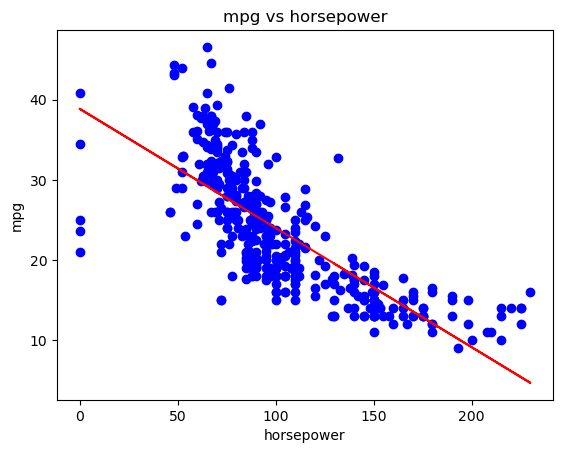

In [212]:
model = LinearRegression()
X = df_auto[['horsepower']]
y = df_auto[['mpg']]
model.fit(df_auto[['horsepower']],df_auto[['mpg']])

plt.scatter(X, y, color= 'blue')
plt.plot(X,
         model.predict(X), color = 'red')
plt.title('mpg vs horsepower')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [213]:
predictions = model.predict(X)
mse = mean_squared_error(df_auto['mpg'], predictions)

print('MSE:',mse)

r2 = r2_score(df_auto['mpg'], predictions)
print("R^2 score: ", r2)

beta = model.coef_
print("Beta coefficients: ", beta)
# Intercept
alpha = model.intercept_
print("Intercept: ", alpha) #both are the same as R

MSE: 25.710643118618073
R^2 score:  0.5791277075260024
Beta coefficients:  [[-0.14893667]]
Intercept:  [38.87923027]


In [214]:
def model_input(X):
    y = 38.87923027 -0.14893667 * X 
    return y 

print('mpg for a horsepower of 98:',model_input(98))

mpg for a horsepower of 98: 24.283436610000003


In [215]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Fit the model using statsmodels to get more statistical information
X = sm.add_constant(df_auto['horsepower'])  # Add a constant term to the predictor
y = df_auto['mpg']
model = sm.OLS(y, X)
results = model.fit()

# Predict the value for a horsepower of 98
X_new = np.array([1, 98])  # The new predictor value (with a constant term)
y_pred = results.predict(X_new)

# Calculate the confidence interval
conf_int = results.conf_int(alpha=0.05)
print('Confidence interval for the coefficients:', conf_int)

# Calculate the prediction interval
_, pred_lower, pred_upper = wls_prediction_std(results, exog=X_new.reshape(1, -1), alpha=0.05)
print('Prediction interval for the predicted value:', (pred_lower[0], pred_upper[0]))

Confidence interval for the coefficients:                     0          1
const       37.489968  40.268492
horsepower  -0.161496  -0.136377
Prediction interval for the predicted value: (14.276771458561068, 34.29010220489704)


In [216]:
# Fit the model
#model = sm.OLS(y, X)
#results = model.fit()
#print(results.summary()) 

### Problem 8 answers to (a) 
- (i) yes, there is a relationship between the predictor and the response 
- (ii) The relationship is quite strong but the whole relationship is not taken into account by the OLS, because it is not truly linear. 
- (iii) It is a negative relationship. The coefficient is -0.14893667. 
- (iv) mpg for a horsepower of 98: 24.283436610000003



9. This question involves the use of multiple linear regression on the Auto data set.
- (a) Produce a scatterplot matrix which includes all of the variables in the data set.
- (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.
- (c) Use the $\operatorname{lm}$ () function to perform a multiple linear regression with $\mathrm{mpg}$ as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output, For instance:
    - i. Is there a relationship between the predictors and the response?
    - ii. Which predictors appear to have a statistically significant relationship to the response?
    - iii. What does the coefficient for the year variable suggest?
- (d) Use the plot () function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
- (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
- (f) Try a few different transformations of the variables, such as $\log (X), \sqrt{X}, X^2$. Comment on your findings.


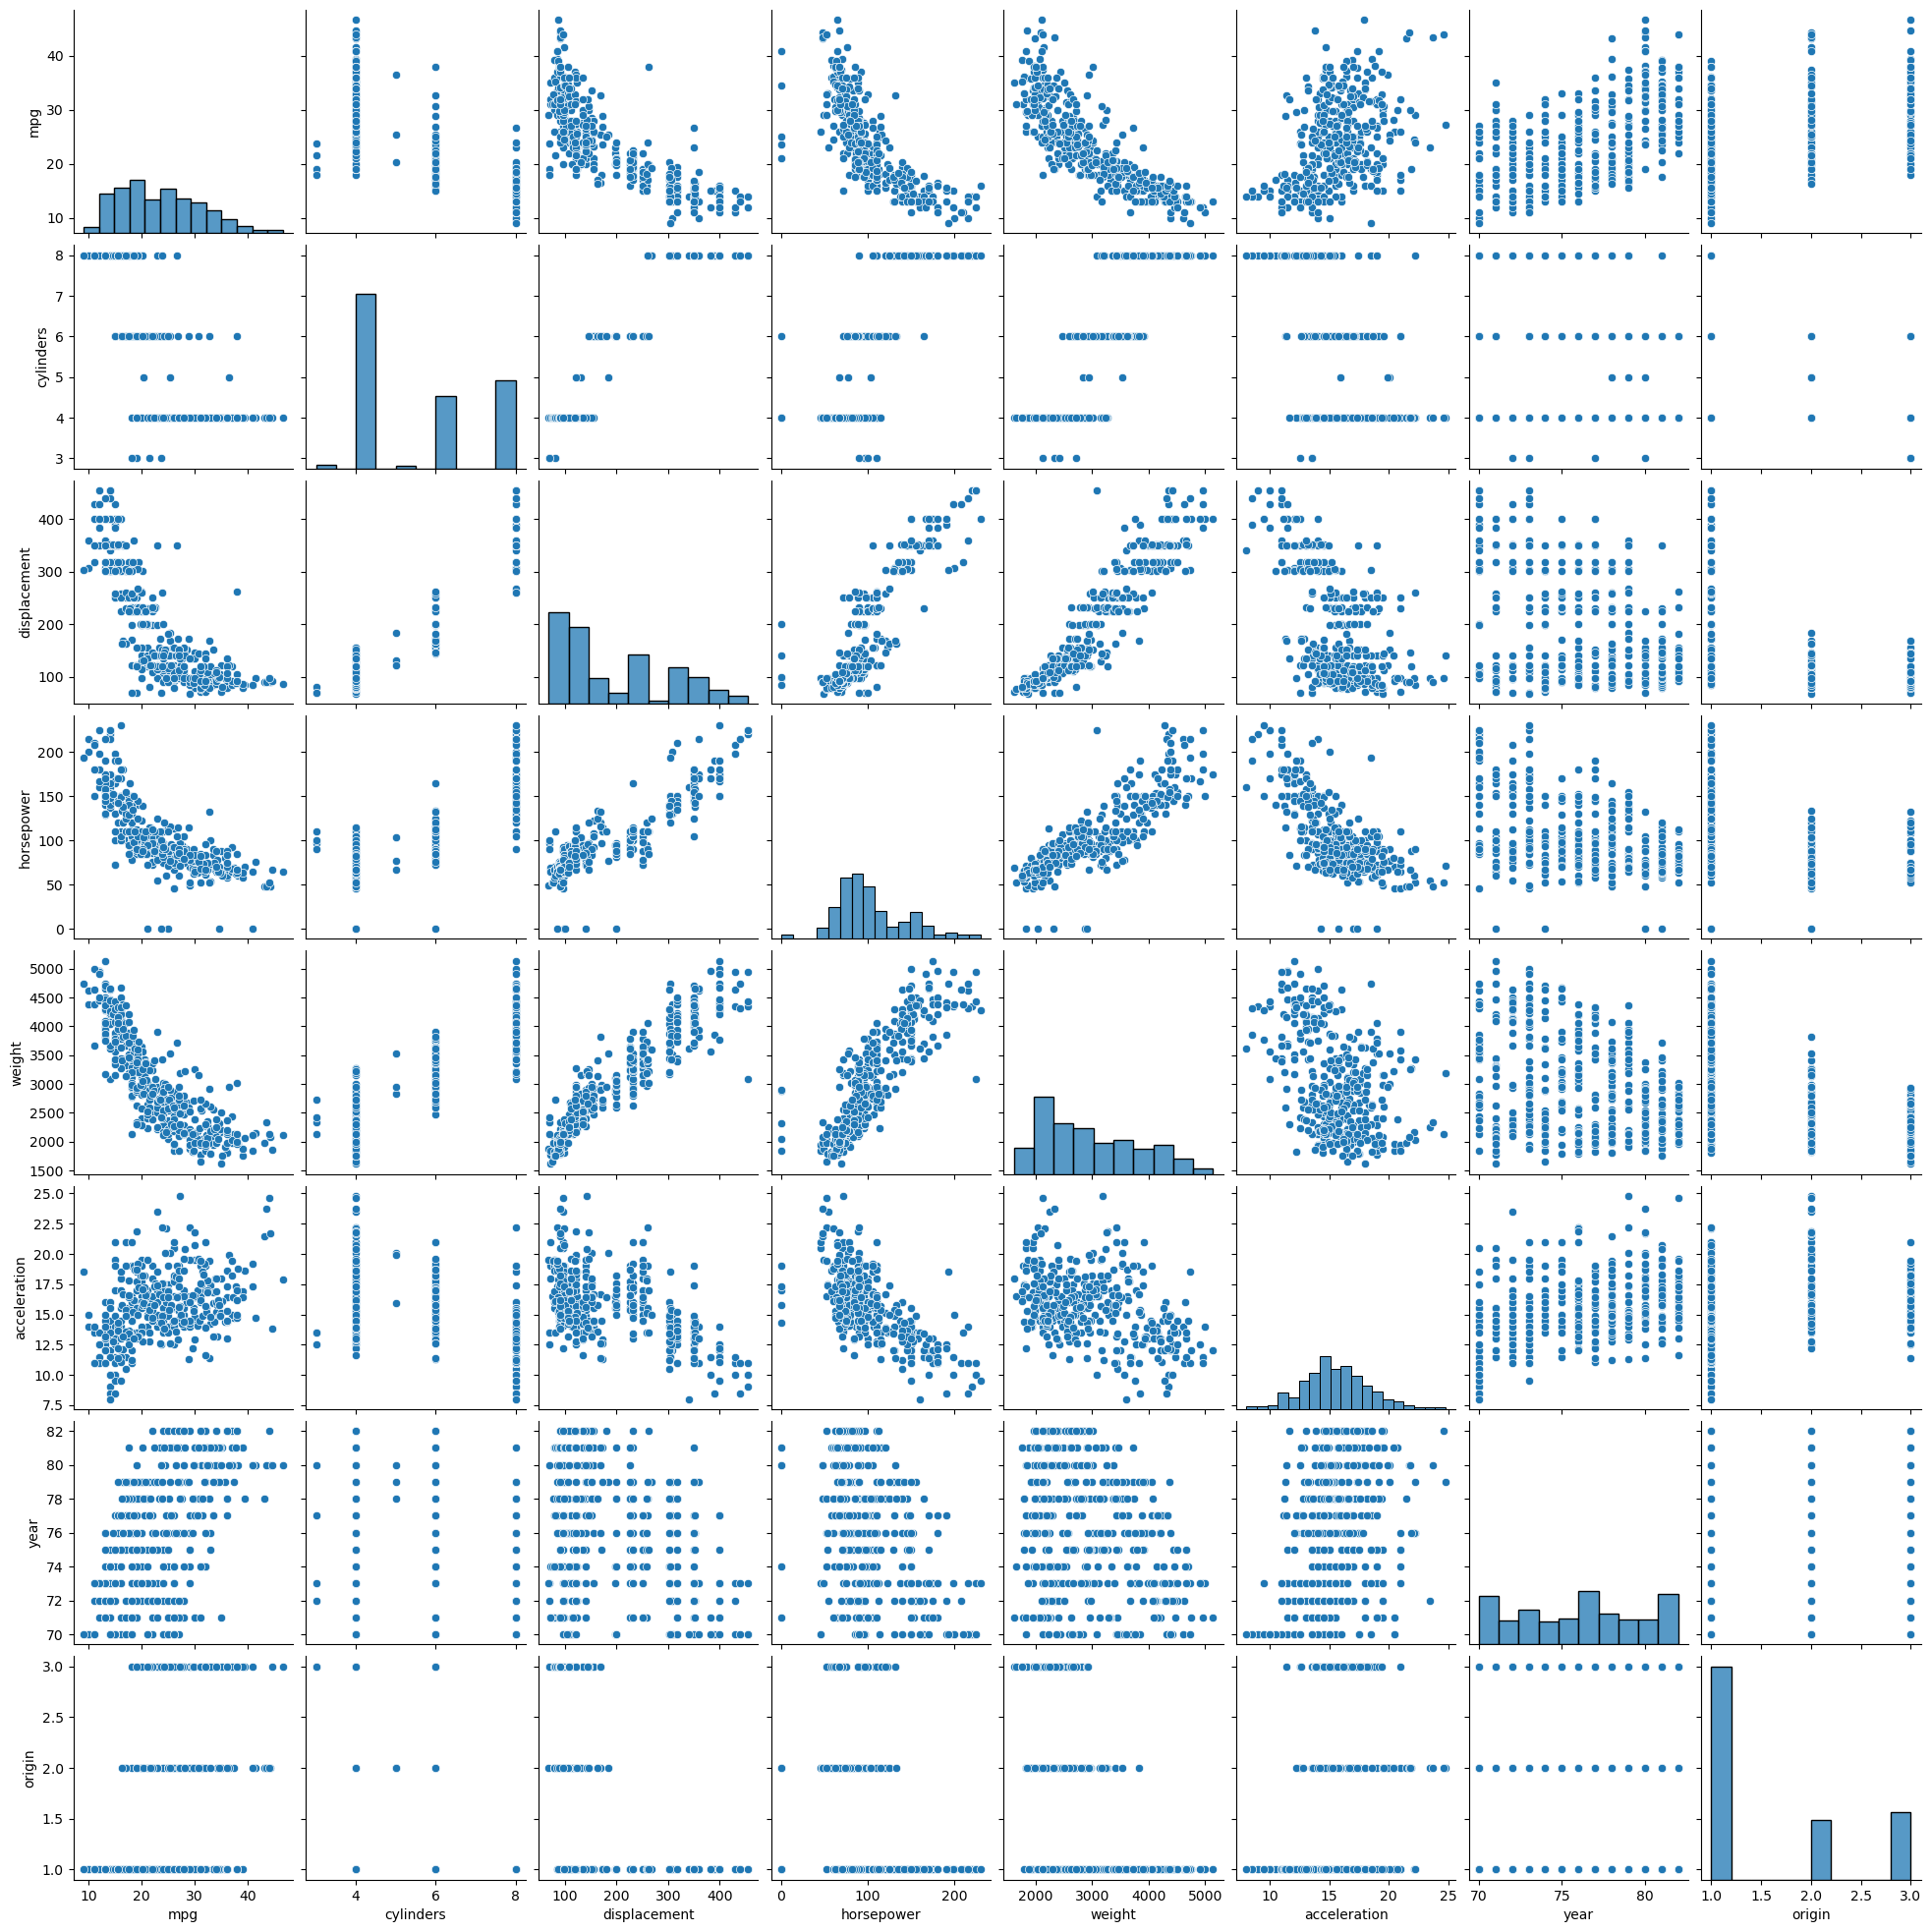

In [217]:
#(a)
sns.pairplot(df_auto)
plt.show()

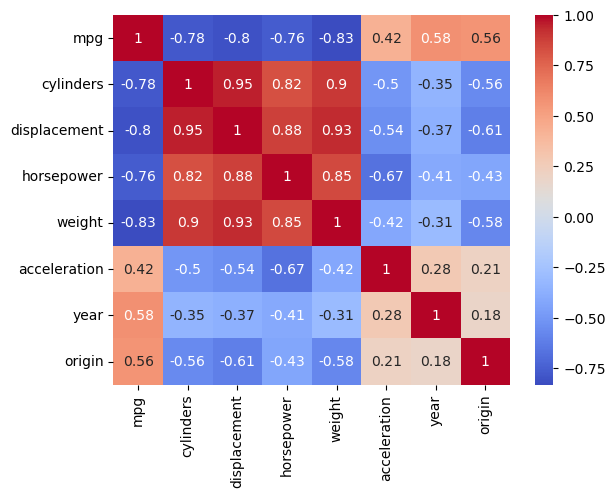

In [218]:
#(b)
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
df_corr_matrix = df_auto[columns].corr()
# Create a heatmap of the correlation matrix
sns.heatmap(df_corr_matrix, annot=True, cmap='coolwarm')
# Display the heatmap
plt.show()


In [219]:
#(c)
# Create a multiple linear regression model involving all the predictors.
model = ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df_auto).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          1.28e-141
Time:                        20:10:42   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9640      4.449     -4.038   

(c)
- (i) The R-squared value of 82.2% from the model indicates that approximately 82.2% of the variation in miles per gallon (mpg) can be explained by the predictors (cylinders, displacement, horsepower, weight, acceleration, year, and origin) in the model. This suggests a strong relationship between these predictors and the mpg.

- (ii)based off the p values for the predictors cylinders, horsepower, and accelertation are not significant at the 5% level. The predictors displacement, weight, year, and origin show statisical significance. 
- (iii) The coefficient for the year variable, is  0.7574. This means for every unit increase in year, the predicted value mpg increase by .7574, assuming all other variables in the model are held constant 

eval_env: 1


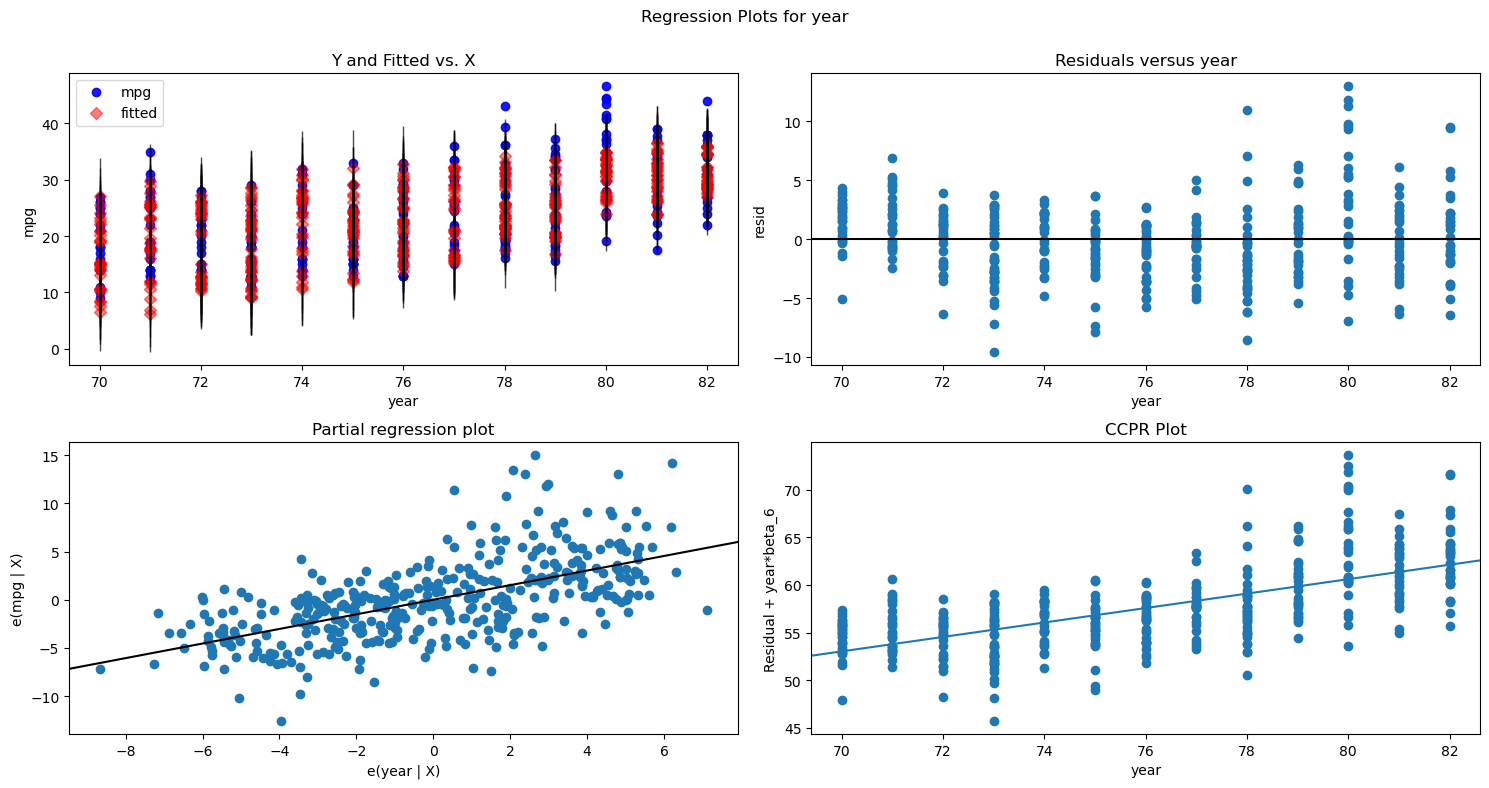

In [220]:
#(d)
# Fit the model
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df_auto)
results = model.fit()

# Create the diagnostic plots
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(results, 'year', fig=fig)
plt.show()

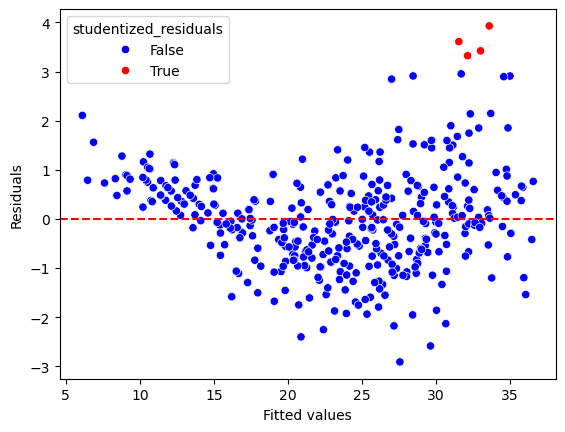

In [221]:
# Calculate standardized residuals
df_auto['studentized_residuals'] = results.get_influence().resid_studentized_internal

# Define a threshold for outliers
threshold = 3

# Create a boolean Series for outliers
outliers = np.abs(df_auto['studentized_residuals']) > threshold

# Create residuals vs fitted values plot
sns.scatterplot(x=results.fittedvalues, y=df_auto['studentized_residuals'], hue=outliers, palette={False: 'blue', True: 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

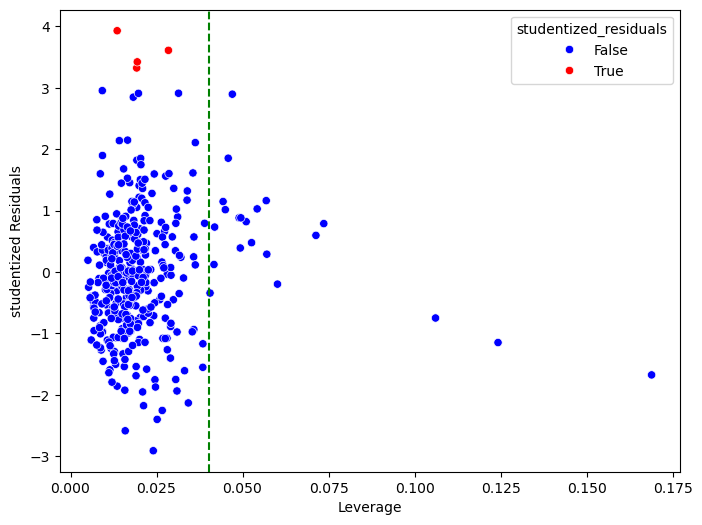

In [222]:
import seaborn as sns

# Calculate influence measures
influence = results.get_influence()

# Get leverage and standardized residuals
df_auto['leverage'] = influence.hat_matrix_diag
df_auto['studentized_residuals'] = influence.resid_studentized_internal

# Define a threshold for outliers
threshold = 3

# Create a boolean Series for outliers
outliers = np.abs(df_auto['studentized_residuals']) > threshold

# Create standardized residual vs high leverage plot
plt.subplots(figsize=(8,6))
sns.scatterplot(x='leverage', y='studentized_residuals', hue=outliers, data=df_auto, palette={False: 'blue', True: 'red'})
plt.xlabel('Leverage')
plt.ylabel('studentized Residuals')

# Add a vertical line at 2*(p+1)/n
p = len(results.params) - 1  # number of predictors
n = len(df_auto)  # number of observations
high_leverage_threshold = 2*(p+1)/n
plt.axvline(x=high_leverage_threshold, color='g', linestyle='--')

plt.show()

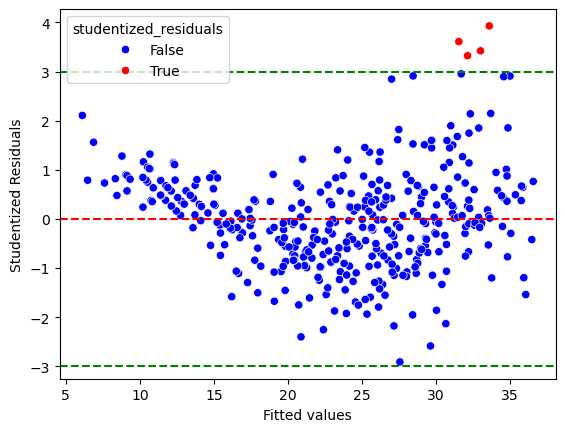

In [223]:
# Create studentized residuals vs fitted values plot
sns.scatterplot(x=results.fittedvalues, y=df_auto['studentized_residuals'], hue=outliers, palette={False: 'blue', True: 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Add horizontal lines at y=-3 and y=3 
plt.axhline(y=-3, color='g', linestyle='--')
plt.axhline(y=3, color='g', linestyle='--')

plt.show()

(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [224]:

formula ='mpg ~ displacement + weight  + year + origin + displacement:weight + acceleration:weight +  year:weight + horsepower:weight'
model = smf.ols(formula, data=df_auto).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     317.0
Date:                Fri, 26 Jan 2024   Prob (F-statistic):          5.62e-165
Time:                        20:10:46   Log-Likelihood:                -978.71
No. Observations:                 397   AIC:                             1975.
Df Residuals:                     388   BIC:                             2011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -73.8715    

(e) displacement:weight, acceleration:weight , year:weight , and horsepower:weight all appear to be statistically significant. 

# Question 10


In [225]:
df_carseats = pd.read_csv('../datasets/Carseats.csv')

In [226]:
#(a)
formula = 'Sales ~ Price + C(Urban) + C(US)'
model = smf.ols(formula, data=df_carseats).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           2.39e-23
Time:                        20:10:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b)
The coefficient for the Price variable, is  -0.0545. This means for every unit increase in Price, the predicted value Sales decreased by 0.0545, assuming all other variables in the model are held constant 

For the united states, the coefficient 1.2006 indiciates the Sales in the us are expected to higher by 1.2006 unites compared to outside the united states 

For Urban, the coefficient is -0.0219 indicating that Sales in urban enviroments are expected to be lower by 0.0219 compared to outside urban enviroments 

(c)
Sales = $13.0435 -0.0219 Urban + 1.2006 US -0.0545 Price$

(d) you can reject the null hypothesis for US and Price suiggesting that US and Price are statistically significant

In [227]:
#(e) 
formula = 'Sales ~ Price + C(US)'
model = smf.ols(formula, data=df_carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           2.66e-24
Time:                        20:10:47   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f)
Both models seem to perform quite poorly. Both have an R^2 statistic of around .235, meaing that only 23.5% of the variation in Sales is accounted for by the model. 

In [228]:
#(g)
# Assuming you have already fitted the model
confidence_interval = model.conf_int()
print(confidence_interval)


                     0          1
Intercept     11.79032  14.271265
C(US)[T.Yes]   0.69152   1.707766
Price         -0.06476  -0.044195


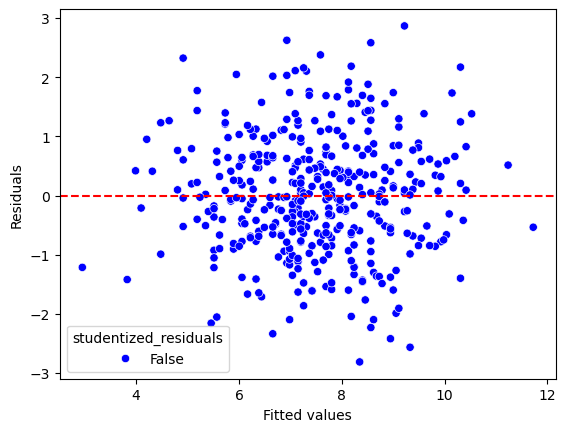

In [229]:
# Calculate standardized residuals
df_carseats['studentized_residuals'] = model.get_influence().resid_studentized_internal

# Define a threshold for outliers
threshold = 3

# Create a boolean Series for outliers
outliers = np.abs(df_carseats['studentized_residuals']) > threshold

# Create residuals vs fitted values plot
sns.scatterplot(x=model.fittedvalues, y=df_carseats['studentized_residuals'], hue=outliers, palette={False: 'blue', True: 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

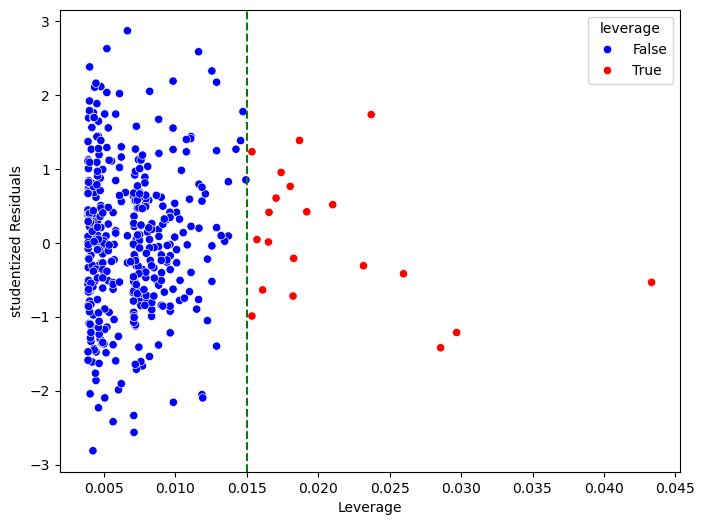

In [231]:
import seaborn as sns

# Calculate influence measures
influence = model.get_influence()

# Get leverage and standardized residuals
df_carseats['leverage'] = influence.hat_matrix_diag
df_carseats['studentized_residuals'] = influence.resid_studentized_internal

# Define a threshold for outliers and high leverage points
outlier_threshold = 3
p = len(model.params) - 1  # number of predictors
n = len(df_carseats)  # number of observations
leverage_threshold = 2*(p+1)/n

# Create boolean Series for outliers and high leverage points
outliers = np.abs(df_carseats['studentized_residuals']) > outlier_threshold
high_leverage_points = df_carseats['leverage'] > leverage_threshold

# Create standardized residual vs high leverage plot
plt.subplots(figsize=(8,6))
sns.scatterplot(x='leverage', y='studentized_residuals', hue=high_leverage_points, data=df_carseats, palette={False: 'blue', True: 'red'})
plt.xlabel('Leverage')
plt.ylabel('studentized Residuals')

# Add a vertical line at the leverage threshold
plt.axvline(x=leverage_threshold, color='g', linestyle='--')

plt.show()

In [232]:
import plotly.express as px

# Create a DataFrame with the data for the plot
df_plot = df_carseats[['leverage', 'studentized_residuals']].copy()
df_plot['High Leverage'] = df_plot['leverage'] > leverage_threshold

# Create the scatter plot
fig = px.scatter(df_plot, x='leverage', y='studentized_residuals', color='High Leverage',
                 color_discrete_sequence=['blue', 'red'], hover_data=['leverage', 'studentized_residuals'])

# Add a vertical line at the leverage threshold
fig.add_shape(type='line', line=dict(dash='dash'), x0=leverage_threshold, x1=leverage_threshold, y0=df_plot['studentized_residuals'].min(), y1=df_plot['studentized_residuals'].max())

# Show the plot
fig.show()

(h)
based off of studentized residuals, there no evidence of outliers there, but looking at high leverage, they is evidence of points of too high leverage in the model. 